## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp_l1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


def build_mlp_l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    

    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l2(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0423 22:15:04.715976  2304 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0423 22:15:04.715976  2304 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0423 22:15:04.727974  2304 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0423 22:15:04.728976  2304 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0423 22:15:04.729977  2304 deprecation_wrapper.py:119] From D:\Anaconda3\li

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 46us/step - loss: 15.0603 - acc: 0.2742 - val_loss: 13.9322 - val_acc: 0.3456
Epoch 2/50
50000/50000 [==============================] - 2s 40us/step - loss: 12.9997 - acc: 0.3633 - val_loss: 12.1071 - val_acc: 0.3786
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 11.3281 - acc: 0.3881 - val_loss: 10.5770 - val_acc: 0.3913
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 9.9157 - acc: 0.4033 - val_loss: 9.2809 - val_acc: 0.4043
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 8.7148 - acc: 0.4121 - val_loss: 8.1790 - val_acc: 0.4167
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 7.6931 - acc: 0.4228 - val_loss: 7.2350 - val_acc: 0.4235
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 6.8213 - acc: 0.4287 - val_loss: 6.4326 - v

50000/50000 [==============================] - 2s 41us/step - loss: 5.7444 - acc: 0.3547 - val_loss: 5.6687 - val_acc: 0.3669
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 5.6008 - acc: 0.3815 - val_loss: 5.5389 - val_acc: 0.3857
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 5.4796 - acc: 0.4048 - val_loss: 5.4327 - val_acc: 0.4111
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 5.3721 - acc: 0.4205 - val_loss: 5.3284 - val_acc: 0.4195
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 5.2717 - acc: 0.4339 - val_loss: 5.2353 - val_acc: 0.4341
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 5.1764 - acc: 0.4451 - val_loss: 5.1505 - val_acc: 0.4388
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 5.0853 - acc: 0.4563 - val_loss: 5.0752 - val_acc: 0.4438
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 40us/step - loss: 1.8540 - acc: 0.4022 - val_loss: 1.8235 - val_acc: 0.4115
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7980 - acc: 0.4193 - val_loss: 1.7727 - val_acc: 0.4263
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7507 - acc: 0.4381 - val_loss: 1.7549 - val_acc: 0.4321
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7119 - acc: 0.4522 - val_loss: 1.7121 - val_acc: 0.4406
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6769 - acc: 0.4623 - val_loss: 1.6739 - val_acc: 0.4537
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6473 - acc: 0.4720 - val_loss: 1.6631 - val_acc: 0.4624
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6204 - acc: 0.4812 - val_loss: 1.6625 - val_acc: 0.4624
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 40us/step - loss: 1.6581 - acc: 0.4173 - val_loss: 1.6484 - val_acc: 0.4231
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6126 - acc: 0.4327 - val_loss: 1.5958 - val_acc: 0.4388
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5726 - acc: 0.4480 - val_loss: 1.5758 - val_acc: 0.4505
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5411 - acc: 0.4588 - val_loss: 1.5416 - val_acc: 0.4556
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5125 - acc: 0.4680 - val_loss: 1.5271 - val_acc: 0.4579
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4860 - acc: 0.4790 - val_loss: 1.5023 - val_acc: 0.4665
Epoch 10/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4611 - acc: 0.4862 - val_loss: 1.4897 - val_acc: 0.4680
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 2s 40us/step - loss: 1.6166 - acc: 0.4326 - val_loss: 1.6124 - val_acc: 0.4301
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5768 - acc: 0.4446 - val_loss: 1.5654 - val_acc: 0.4511
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5410 - acc: 0.4596 - val_loss: 1.5447 - val_acc: 0.4538
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5113 - acc: 0.4691 - val_loss: 1.5286 - val_acc: 0.4594
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4836 - acc: 0.4777 - val_loss: 1.4996 - val_acc: 0.4682
Epoch 10/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4578 - acc: 0.4884 - val_loss: 1.4893 - val_acc: 0.4719
Epoch 11/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4355 - acc: 0.4948 - val_loss: 1.4745 - val_acc: 0.4710
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 2s 40us/step - loss: 1.5810 - acc: 0.4460 - val_loss: 1.5860 - val_acc: 0.4357
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5500 - acc: 0.4557 - val_loss: 1.5513 - val_acc: 0.4508
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5205 - acc: 0.4663 - val_loss: 1.5294 - val_acc: 0.4603
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4943 - acc: 0.4766 - val_loss: 1.5209 - val_acc: 0.4599
Epoch 10/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4704 - acc: 0.4837 - val_loss: 1.4889 - val_acc: 0.4753
Epoch 11/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4463 - acc: 0.4951 - val_loss: 1.4757 - val_acc: 0.4762
Epoch 12/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4256 - acc: 0.5002 - val_loss: 1.4698 - val_acc: 0.4760
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 2s 40us/step - loss: 1.5581 - acc: 0.4526 - val_loss: 1.5529 - val_acc: 0.4517
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5247 - acc: 0.4657 - val_loss: 1.5317 - val_acc: 0.4603
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4968 - acc: 0.4764 - val_loss: 1.5226 - val_acc: 0.4642
Epoch 10/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4698 - acc: 0.4863 - val_loss: 1.4923 - val_acc: 0.4695
Epoch 11/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4460 - acc: 0.4946 - val_loss: 1.4754 - val_acc: 0.4773
Epoch 12/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4221 - acc: 0.5027 - val_loss: 1.4575 - val_acc: 0.4849
Epoch 13/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.4012 - acc: 0.5069 - val_loss: 1.4446 - val_acc: 0.4910
Epoch 14/50
50000/50000 [=======================

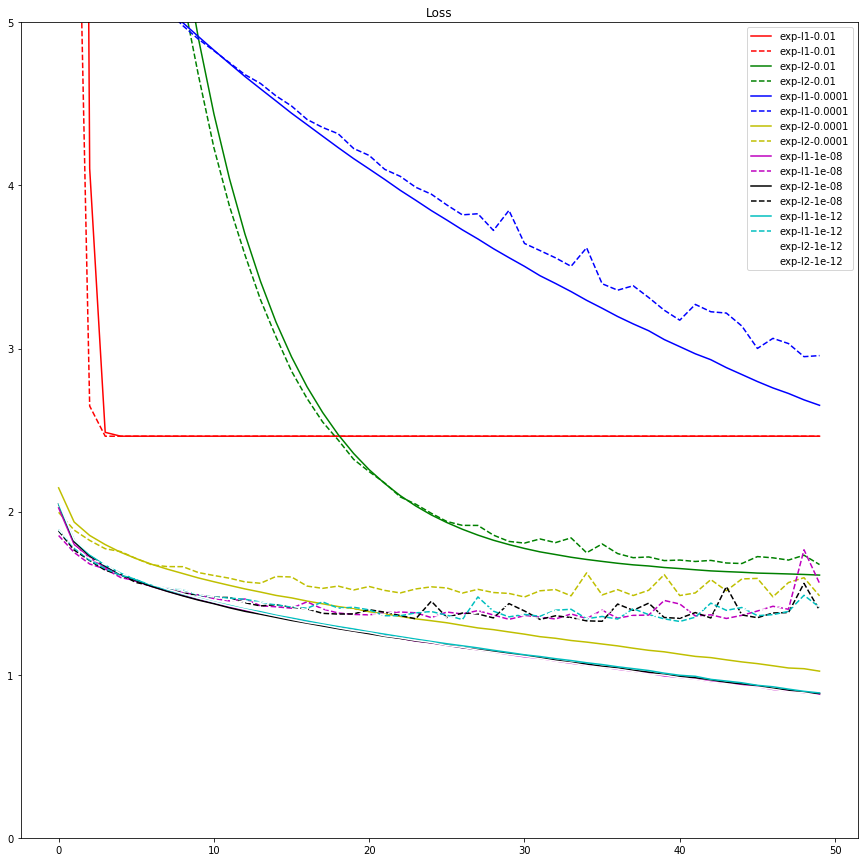

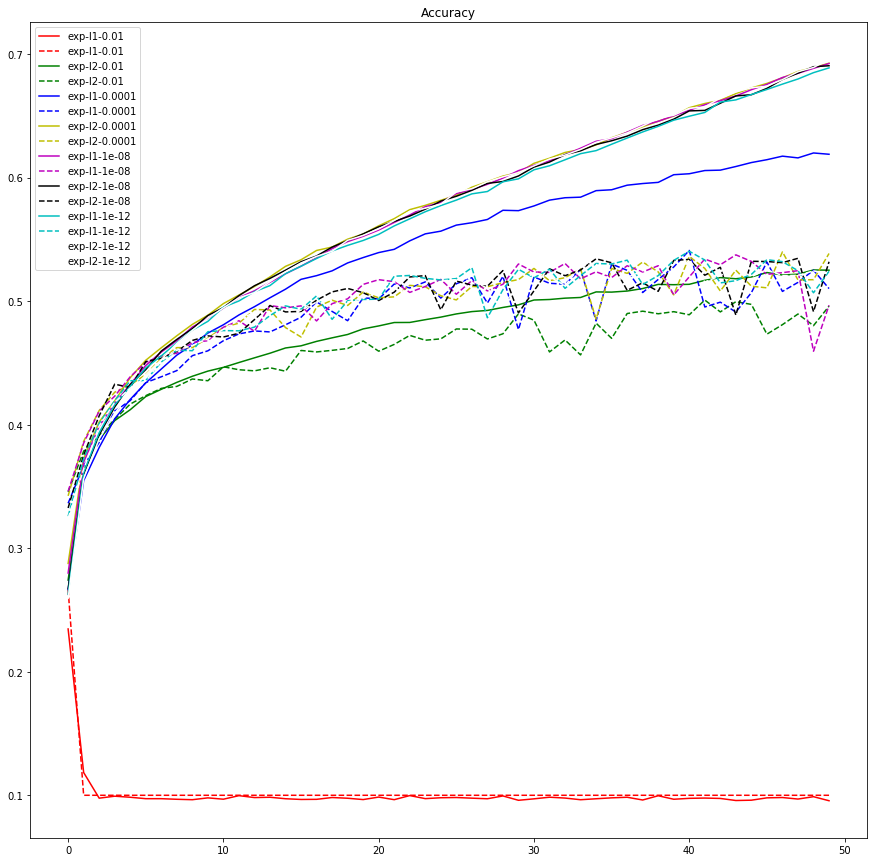

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "w"]

plt.figure(figsize=(15,15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(15,15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()